 ### **Hospital Stay Prediction: EDA, Preprocessing and Model Building**


### **Introduction**:

- In the healthcare domain, predicting the length of hospital stay is crucial for effective resource management, bed allocation, and patient care optimization. 
- Hospitals can better plan treatments and manage costs if they can anticipate how long a patient might stay.
- This project explores a dataset containing patient demographics, hospital admission details, and medical information to analyze and predict the duration of a patient's hospital stay.

### **Objective**

- The goal of this project is to perform **Exploratory Data Analysis (EDA), Data Preprocessing**, and **build machine learning models** 
- to accurately predict a patient's hospital stay duration. We will evaluate multiple regression models and choose the best-performing one.

### **Dataset Overview**

- The dataset contains approximately **10,000 records** and **18 features**, including:

- **Categorical Variables:** Hospital type, Hospital region, Department, Ward type, Admission type, Severity of illness, Age group, etc.
- **Numerical Variables:** Available extra rooms, Number of visitors, Admission delay, etc.
- **Target Variable:** Length of Stay (e.g., "0-10 days", "11-20 days", "21+ days" or actual number)


## Importing Necessary Libraries :



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC, OneClassSVM
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import RidgeClassifier, Lasso
from sklearn.preprocessing import StandardScaler,FunctionTransformer
from sklearn.compose import   ColumnTransformer
import sys
import os
import warnings
warnings.filterwarnings('ignore')

## Load the Dataset :

In [3]:
import os
file_path = r'F:\Machine_Learning\Ml_Projects\Hospital_Stay_Prediction\data\raw\HealthCareAnalytics.csv'

try:
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"File not found: {file_path}")

    df = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
    print("Shape of the dataset:", df.shape)

except FileNotFoundError as fnf_error:
    print(f"{fnf_error}")
except pd.errors.EmptyDataError:
    print(" The CSV file is empty.")
except pd.errors.ParserError:
    print(" Error while parsing the CSV file.")
except Exception as e:
    print(f"Unexpected error occurred: {e}")


Dataset loaded successfully.
Shape of the dataset: (318438, 18)


### Initial Basic Checks :

In [4]:
# Show first 5 rows
display(df.head())

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558,41-50


In [5]:
# Shape of the dataset
print(f"\n Dataset Shape: {df.shape[0]} rows and {df.shape[1]} columns")


 Dataset Shape: 318438 rows and 18 columns


In [6]:
# Column names
print(df.columns.tolist())

['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital', 'Hospital_region_code', 'Available_Extra_Rooms_in_Hospital', 'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed_Grade', 'patientid', 'City_Code_Patient', 'Type_of_Admission', 'Severity_of_Illness', 'Visitors_with_Patient', 'Age', 'Admission_Deposit', 'Stay']


In [7]:
# Data types
print("\nData Types:")
print(df.dtypes)


Data Types:
case_id                                int64
Hospital_code                          int64
Hospital_type_code                    object
City_Code_Hospital                     int64
Hospital_region_code                  object
Available_Extra_Rooms_in_Hospital      int64
Department                            object
Ward_Type                             object
Ward_Facility_Code                    object
Bed_Grade                            float64
patientid                              int64
City_Code_Patient                    float64
Type_of_Admission                     object
Severity_of_Illness                   object
Visitors_with_Patient                  int64
Age                                   object
Admission_Deposit                      int64
Stay                                  object
dtype: object


In [8]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available_Extra_Rooms_in_Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed_Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [9]:
# Summary statistics
display(df.describe())

,case_id,Hospital_code,City_Code_Hospital,Available_Extra_Rooms_in_Hospital,Bed_Grade,patientid,City_Code_Patient,Visitors_with_Patient,Admission_Deposit
count,318438.000000,318438.000000,318438.000000,318438.000000,318325.000000,318438.000000,313906.000000,318438.000000,318438.000000
mean,159219.500000,18.318841,4.771717,3.197627,2.625807,65747.579472,7.251859,3.284099,4880.749392
std,91925.276848,8.633755,3.102535,1.168171,0.873146,37979.936440,4.745266,1.764061,1086.776254
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1800.000000
25%,79610.250000,11.000000,2.000000,2.000000,2.000000,32847.000000,4.000000,2.000000,4186.000000
50%,159219.500000,19.000000,5.000000,3.000000,3.000000,65724.500000,8.000000,3.000000,4741.000000
75%,238828.750000,26.000000,7.000000,4.000000,3.000000,98470.000000,8.000000,4.000000,5409.000000
max,318438.000000,32.000000,13.000000,24.000000,4.000000,131624.000000,38.000000,32.000000,11008.000000


In [10]:
print(df.isnull().sum())

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available_Extra_Rooms_in_Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed_Grade                             113
patientid                               0
City_Code_Patient                    4532
Type_of_Admission                       0
Severity_of_Illness                     0
Visitors_with_Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64


In [11]:
print(df.columns[df.dtypes=='object'].tolist())

['Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type', 'Ward_Facility_Code', 'Type_of_Admission', 'Severity_of_Illness', 'Age', 'Stay']


In [12]:
# Check for duplicate rows
print(f"\nDuplicate Rows: {df.duplicated().sum()}")


Duplicate Rows: 0


## Basic Dataset Checks: Interpretation

### Dataset Shape
- The dataset contains **318,438 rows** and **18 columns**.
- This is a large dataset, ideal for reliable machine learning modeling.


###  Feature Overview

- **Numerical Columns (9):**
  - 'case_id', 'Hospital_code', 'City_Code_Hospital', 'Available_Extra_Rooms_in_Hospital', 'Bed_Grade', 'patientid', 'City_Code_Patient', 'Visitors_with_Patient', 'Admission_Deposit'
- **Categorical Columns (9):**
  - 'Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type', 'Ward_Facility_Code', 'Type_of_Admission', 'Severity_of_Illness', 'Age', 'Stay' *(target variable)*


###  Data Types
- Most features have the expected data types.
- **Age** is of type **object** — although it's ordinal, it needs to be processed numerically.
- **Stay** is the **target variable** — it's a categorical variable indicating the hospital stay duration.



###  Missing Values
- **Bed_Grade**: 113 missing values
- **City_Code_Patient**: 4,532 missing values
- These will require appropriate **imputation** or handling during the preprocessing phase.


###  Duplicates
- No duplicate rows found —  clean in this regard.


###  Notes
- All features are important, including hospital and patient IDs, for understanding behavior.
- Some encoding will be required for categorical features during preprocessing.
- We will explore the **distribution of target variable** (`Stay`) next, as it impacts model strategy.





In [ ]:
from scipy.stats import skew, kurtosis

def handle_missing_values(df, skew_thresh=0.5, kurt_thresh=(2, 4)):
    """
    Handles missing values in a DataFrame
    """
    try:
        num_cols = df.select_dtypes(include=['float64', 'int64']).columns
        cat_cols = df.select_dtypes(include=['object']).columns

        for col in num_cols:
            if df[col].isnull().sum() > 0:
                try:
                    col_data = df[col].dropna()

                    col_skew = skew(col_data)
                    col_kurt = kurtosis(col_data)

                    # normality check
                    if (-skew_thresh <= col_skew <= skew_thresh) and (kurt_thresh[0] <= col_kurt <= kurt_thresh[1]):
                        impute_val = df[col].mean()
                        strategy = "mean"
                    else:
                        impute_val = df[col].median()
                        strategy = "median"

                    df[col].fillna(impute_val, inplace=True)
                    print(f" {col}: Imputed with {strategy} (Skew={col_skew:.2f}, Kurtosis={col_kurt:.2f})")

                except Exception as e:
                    print(f" {col}: Fallback to median due to error: {e}")
                    df[col].fillna(df[col].median(), inplace=True)

        for col in cat_cols:
            if df[col].isnull().sum() > 0:
                try:
                    mode_value = df[col].mode()[0]
                    df[col].fillna(mode_value, inplace=True)
                    print(f"{col}: Imputed with mode ({mode_value})")
                except Exception as e:
                    print(f"{col}: Failed to impute categorical column: {e}")

        print("All missing values handled successfully.")

    except Exception as e:
        print(f"Global Error while handling missing values: {e}")

    return df


In [14]:
handle_missing_values(df)

 Bed_Grade: Imputed with median (Skew=0.05, Kurtosis=-0.78)
 City_Code_Patient: Imputed with median (Skew=1.58, Kurtosis=4.41)
All missing values handled successfully.


,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,a,6,X,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144,Nov-20
318434,318435,24,a,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699,31-40
318435,318436,7,a,4,X,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235,Nov-20
318436,318437,11,b,2,Y,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,Nov-20,3761,Nov-20


In [15]:
df.isnull().sum()

case_id                              0
Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available_Extra_Rooms_in_Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed_Grade                            0
patientid                            0
City_Code_Patient                    0
Type_of_Admission                    0
Severity_of_Illness                  0
Visitors_with_Patient                0
Age                                  0
Admission_Deposit                    0
Stay                                 0
dtype: int64

In [16]:
df.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558,41-50


In [17]:
df.dtypes

case_id                                int64
Hospital_code                          int64
Hospital_type_code                    object
City_Code_Hospital                     int64
Hospital_region_code                  object
Available_Extra_Rooms_in_Hospital      int64
Department                            object
Ward_Type                             object
Ward_Facility_Code                    object
Bed_Grade                            float64
patientid                              int64
City_Code_Patient                    float64
Type_of_Admission                     object
Severity_of_Illness                   object
Visitors_with_Patient                  int64
Age                                   object
Admission_Deposit                      int64
Stay                                  object
dtype: object

In [ ]:
import pandas as pd
import numpy as np
from pandas.api.types import CategoricalDtype

def fix_data_types(df, numeric_threshold=0.9):
    try:
        # Define correct order for Age and Stay
        age_order = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60',
                     '61-70', '71-80', '81-90', '91-100']
        stay_order = ['0-10', '11-20', '21-30', '31-40', '41-50',
                      '51-60', '61-70', '71-80', '81-90', '91-100', 'More than 100 Days']

        # Fix 'Age' column
        if 'Age' in df.columns:
            df['Age'] = df['Age'].replace('Nov-20', '11-20')  # Fix possible typo
            age_dtype = CategoricalDtype(categories=age_order, ordered=True)
            df['Age'] = df['Age'].astype(age_dtype)

        # Fix 'Stay' column
        if 'Stay' in df.columns:
            df['Stay'] = df['Stay'].replace('Nov-20', '11-20')  # Fix typo again if present
            stay_dtype = CategoricalDtype(categories=stay_order, ordered=True)
            df['Stay'] = df['Stay'].astype(stay_dtype)

        # Handle other object columns 
        for col in df.select_dtypes(include='object').columns:
            converted_col = pd.to_numeric(df[col], errors='coerce')
            num_valid = converted_col.notna().sum()
            total = len(df[col])
            if num_valid / total >= numeric_threshold:
                df[col] = converted_col
                print(f" Converted '{col}' to numeric. ({num_valid}/{total} valid numbers)")
            else:
                print(f"Keeping '{col}' as object. Only {num_valid}/{total} numeric-like values.")

        print("Data types fixed successfully.")

    except Exception as e:
        print(f" Error while fixing data types: {e}")

    return df


In [19]:
fix_data_types(df)

Keeping 'Hospital_type_code' as object. Only 0/318438 numeric-like values.
Keeping 'Hospital_region_code' as object. Only 0/318438 numeric-like values.
Keeping 'Department' as object. Only 0/318438 numeric-like values.
Keeping 'Ward_Type' as object. Only 0/318438 numeric-like values.
Keeping 'Ward_Facility_Code' as object. Only 0/318438 numeric-like values.
Keeping 'Type_of_Admission' as object. Only 0/318438 numeric-like values.
Keeping 'Severity_of_Illness' as object. Only 0/318438 numeric-like values.
Data types fixed successfully.


,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,a,6,X,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144,11-20
318434,318435,24,a,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699,31-40
318435,318436,7,a,4,X,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235,11-20
318436,318437,11,b,2,Y,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,11-20,3761,11-20


In [20]:
df.dtypes

case_id                                 int64
Hospital_code                           int64
Hospital_type_code                     object
City_Code_Hospital                      int64
Hospital_region_code                   object
Available_Extra_Rooms_in_Hospital       int64
Department                             object
Ward_Type                              object
Ward_Facility_Code                     object
Bed_Grade                             float64
patientid                               int64
City_Code_Patient                     float64
Type_of_Admission                      object
Severity_of_Illness                    object
Visitors_with_Patient                   int64
Age                                  category
Admission_Deposit                       int64
Stay                                 category
dtype: object

### Exploratory Data Analysis (EDA)

## Univariate Analysis: 

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

sns.set_theme(style="whitegrid")

def plot_categorical_columns(df, threshold=20):
    categorical_cols = [col for col in df.columns if df[col].nunique() <= threshold or df[col].dtype == 'object']
    
    n_cols = 3
    n_rows = math.ceil(len(categorical_cols) / n_cols)
    
    plt.figure(figsize=(6 * n_cols, 5 * n_rows))
    plt.suptitle('Categorical Features Distribution', fontsize=24, fontweight='bold', color='Black', y=1.01, style='italic')
    
    for idx, col in enumerate(categorical_cols, 1):
        ax = plt.subplot(n_rows, n_cols, idx)
        value_counts = df[col].value_counts(normalize=True)
        
        sns.barplot(x=value_counts.index.astype(str), y=value_counts.values, ax=ax, palette='Set2')
        for i, val in enumerate(value_counts.values):
            ax.text(i, val, f'{val*100:.1f}%', ha='center', va='bottom', fontsize=9)
        
        ax.set_title(f'{col} Distribution', fontsize=14, fontweight='bold')
        ax.set_xlabel(col, fontsize=12)
        ax.set_ylabel('Percentage')
        ax.tick_params(axis='x', rotation=45)
    
    plt.tight_layout(rect=[0, 0, 1, 0.98])
    plt.show()


def plot_numerical_columns(df, discrete_threshold=20):
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    continuous_cols = [col for col in numeric_cols if df[col].nunique() > discrete_threshold]


    if continuous_cols:
        n_cols = 3
        n_rows = math.ceil(len(continuous_cols) / n_cols)
        plt.figure(figsize=(6 * n_cols, 5 * n_rows))
        plt.suptitle('Continuous Numeric Features Distribution', fontsize=24, fontweight='bold', y=1.01, style='italic')

        for idx, col in enumerate(continuous_cols, 1):
            ax = plt.subplot(n_rows, n_cols, idx)
            sns.histplot(df[col].dropna(), kde=True, ax=ax, color='skyblue')
            ax.set_title(f'{col} Distribution', fontsize=14, fontweight='bold')
            ax.set_xlabel(col, fontsize=12)
            ax.set_ylabel('Count')

        plt.tight_layout(rect=[0, 0, 1, 0.98])
        plt.show()


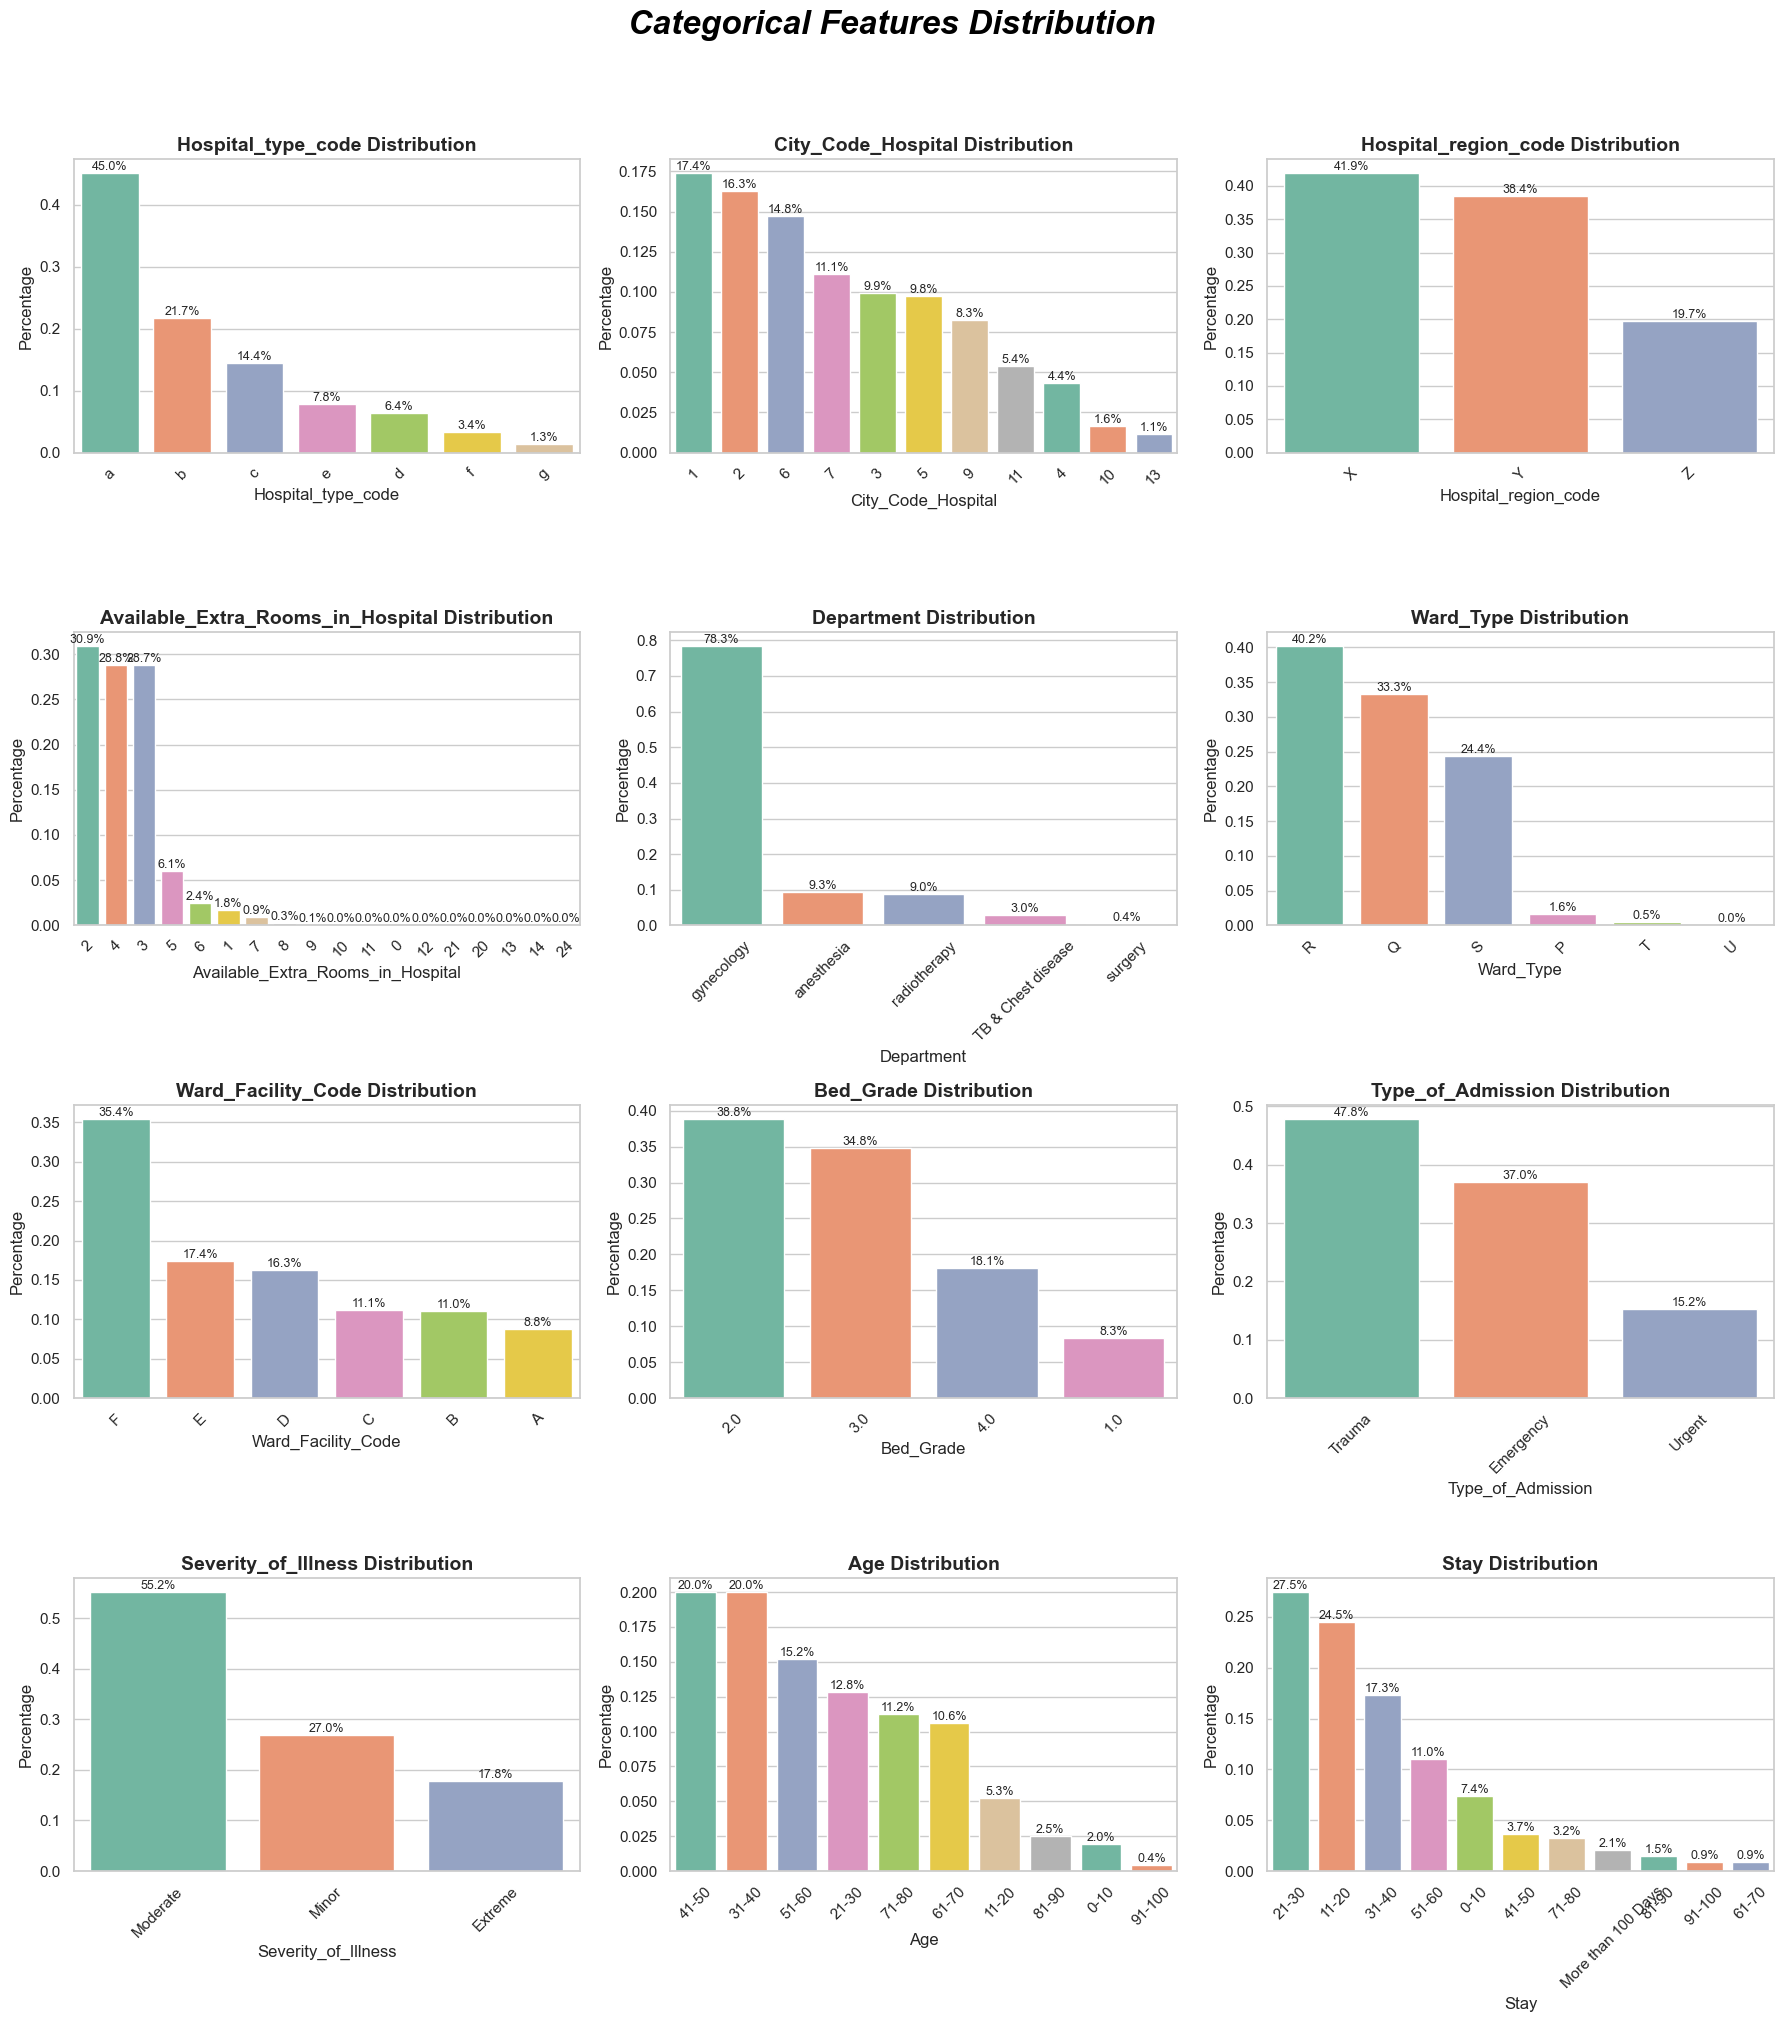

In [22]:
plot_categorical_columns(df)

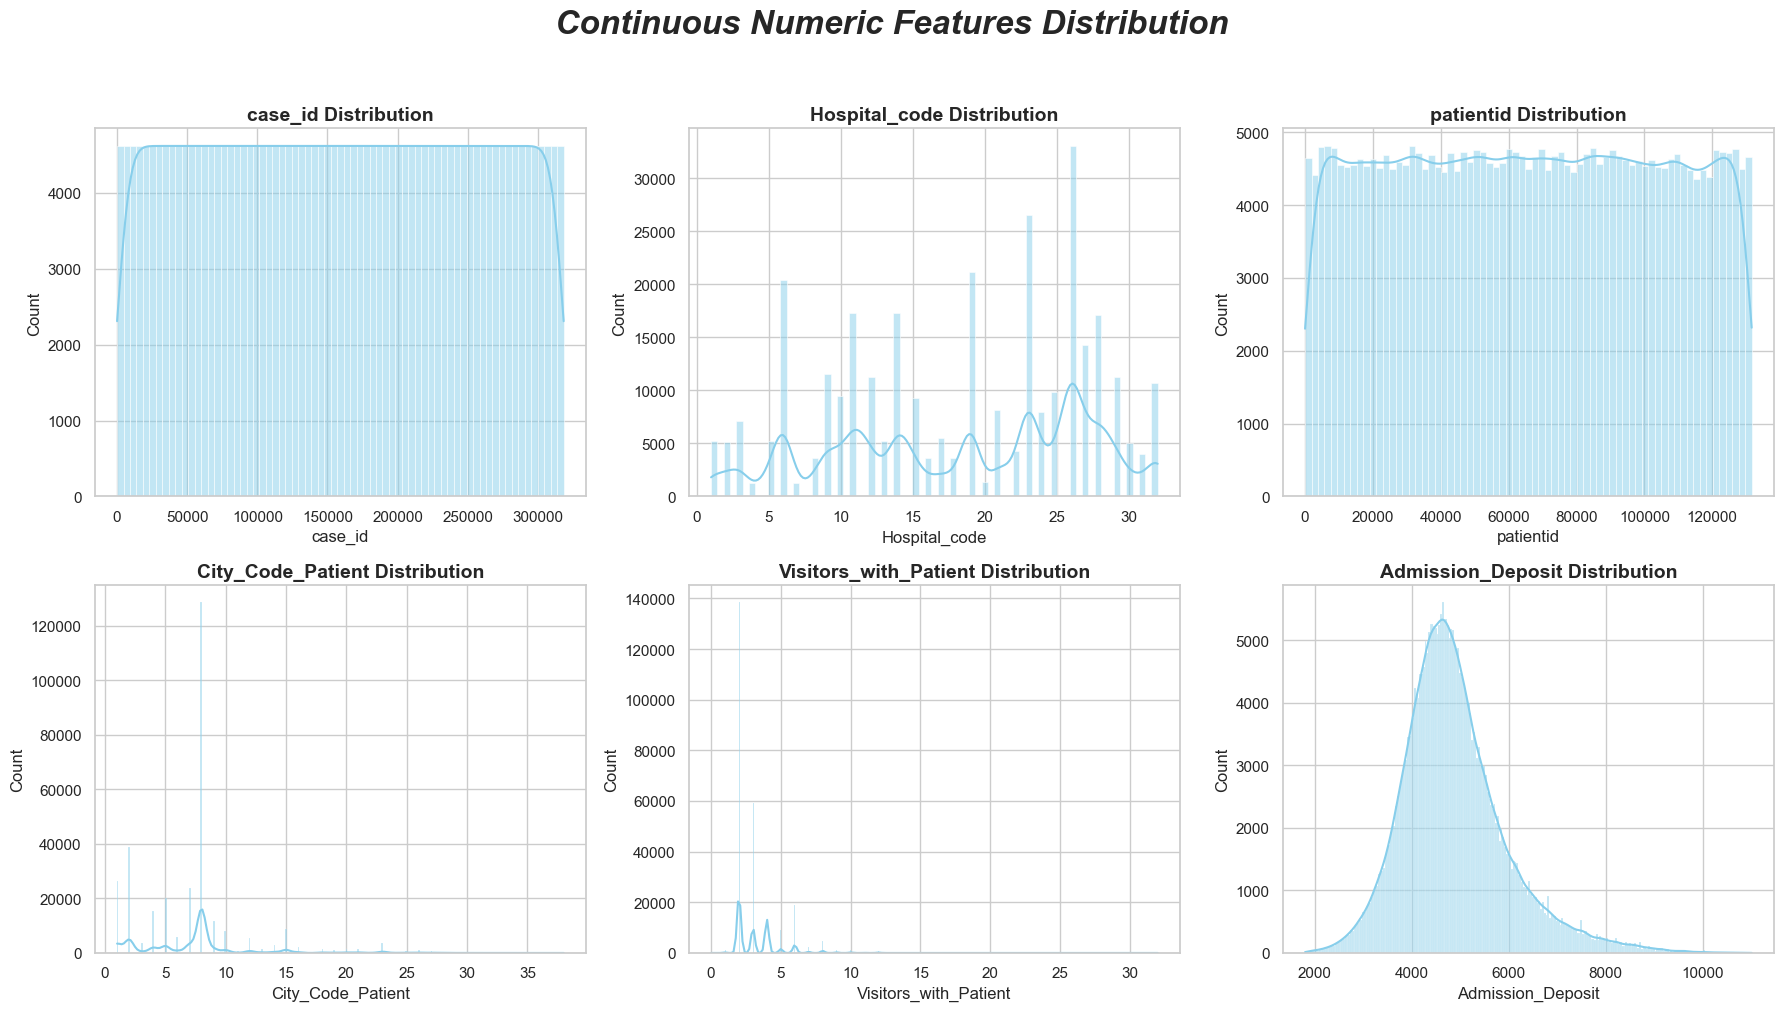

In [23]:
plot_numerical_columns(df)

##  Univariate Interpretation

- **Hospital & City Codes**: Few hospitals and cities handle most patients — highly skewed.
- **Department & Ward Info**: Gynaecology dominates; ward types 'R' and 'Q' are most used.
- **Admission & Severity**: Majority are trauma or emergency cases with moderate illness.
- **Age**: Patients are mostly between 11–40 years; very few elderly cases.
- **Stay Duration**: Short stays (0–5 days) are most common.
- **Numerical Features**:
  - **Admission Deposit** and **Visitors** are right-skewed.
  - **City_Code_Patient** heavily biased toward code 8.
  - **hospital_code** shows uneven patient distribution.
- **IDs** (case_id, patientid) are uniformly distributed — no data quality issues.


## Bivariate Analysis :

In [24]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
continuous_cols = [col for col in numeric_cols if df[col].nunique() > 20]
descrete_cols=[col for col in numeric_cols if df[col].nunique() < 20]
cat_cols=df.select_dtypes(include='O').columns
category_cols=df.select_dtypes(include='category').columns

In [25]:
names=['Categorical','continuous','descrete','ordinal_category']
for i,name in zip([cat_cols,continuous_cols,descrete_cols,category_cols],names):
    print(f' {name} columns : {i}')
    print('----------------------------------------------------------------')
    print()

 Categorical columns : Index(['Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type',
       'Ward_Facility_Code', 'Type_of_Admission', 'Severity_of_Illness'],
      dtype='object')
----------------------------------------------------------------

 continuous columns : ['case_id', 'Hospital_code', 'patientid', 'City_Code_Patient', 'Visitors_with_Patient', 'Admission_Deposit']
----------------------------------------------------------------

 descrete columns : ['City_Code_Hospital', 'Available_Extra_Rooms_in_Hospital', 'Bed_Grade']
----------------------------------------------------------------

 ordinal_category columns : Index(['Age', 'Stay'], dtype='object')
----------------------------------------------------------------



In [26]:
##Bivariate Analysis refers to plots between input variables and target variable.
def bivariate_categorical_plots(columns, data=df):
    try:
        sns.set_theme(style="whitegrid")
        n_cols = 1
        n_rows = (len(columns) + n_cols - 1) // n_cols  
        plt.figure(figsize=(15, 5 * n_rows)) 
        plt.suptitle('Bivariate Analysis of categorical columns ', fontsize=20, fontweight='bold', color='black', y=1.02)

        target = 'Stay'
        for plot, col in enumerate(columns, 1):
            ax = plt.subplot(n_rows, n_cols, plot)
            sns.countplot(data=df, x=col, hue=target, palette='Set2', ax=ax)
            ax.set_xlabel(col, fontsize=12)
            ax.set_ylabel('Count', fontsize=12)
            ax.set_title(f'{col} vs {target} (Count)', fontsize=14)
            ax.tick_params(axis='x', rotation=45)
            ax.legend(title=target, loc='upper right', fontsize=10)

        plt.tight_layout(pad=2.0, h_pad=3.0, w_pad=3.0)
        plt.show()
    except Exception as e:
        print(f'Exception Occurred: {e}')

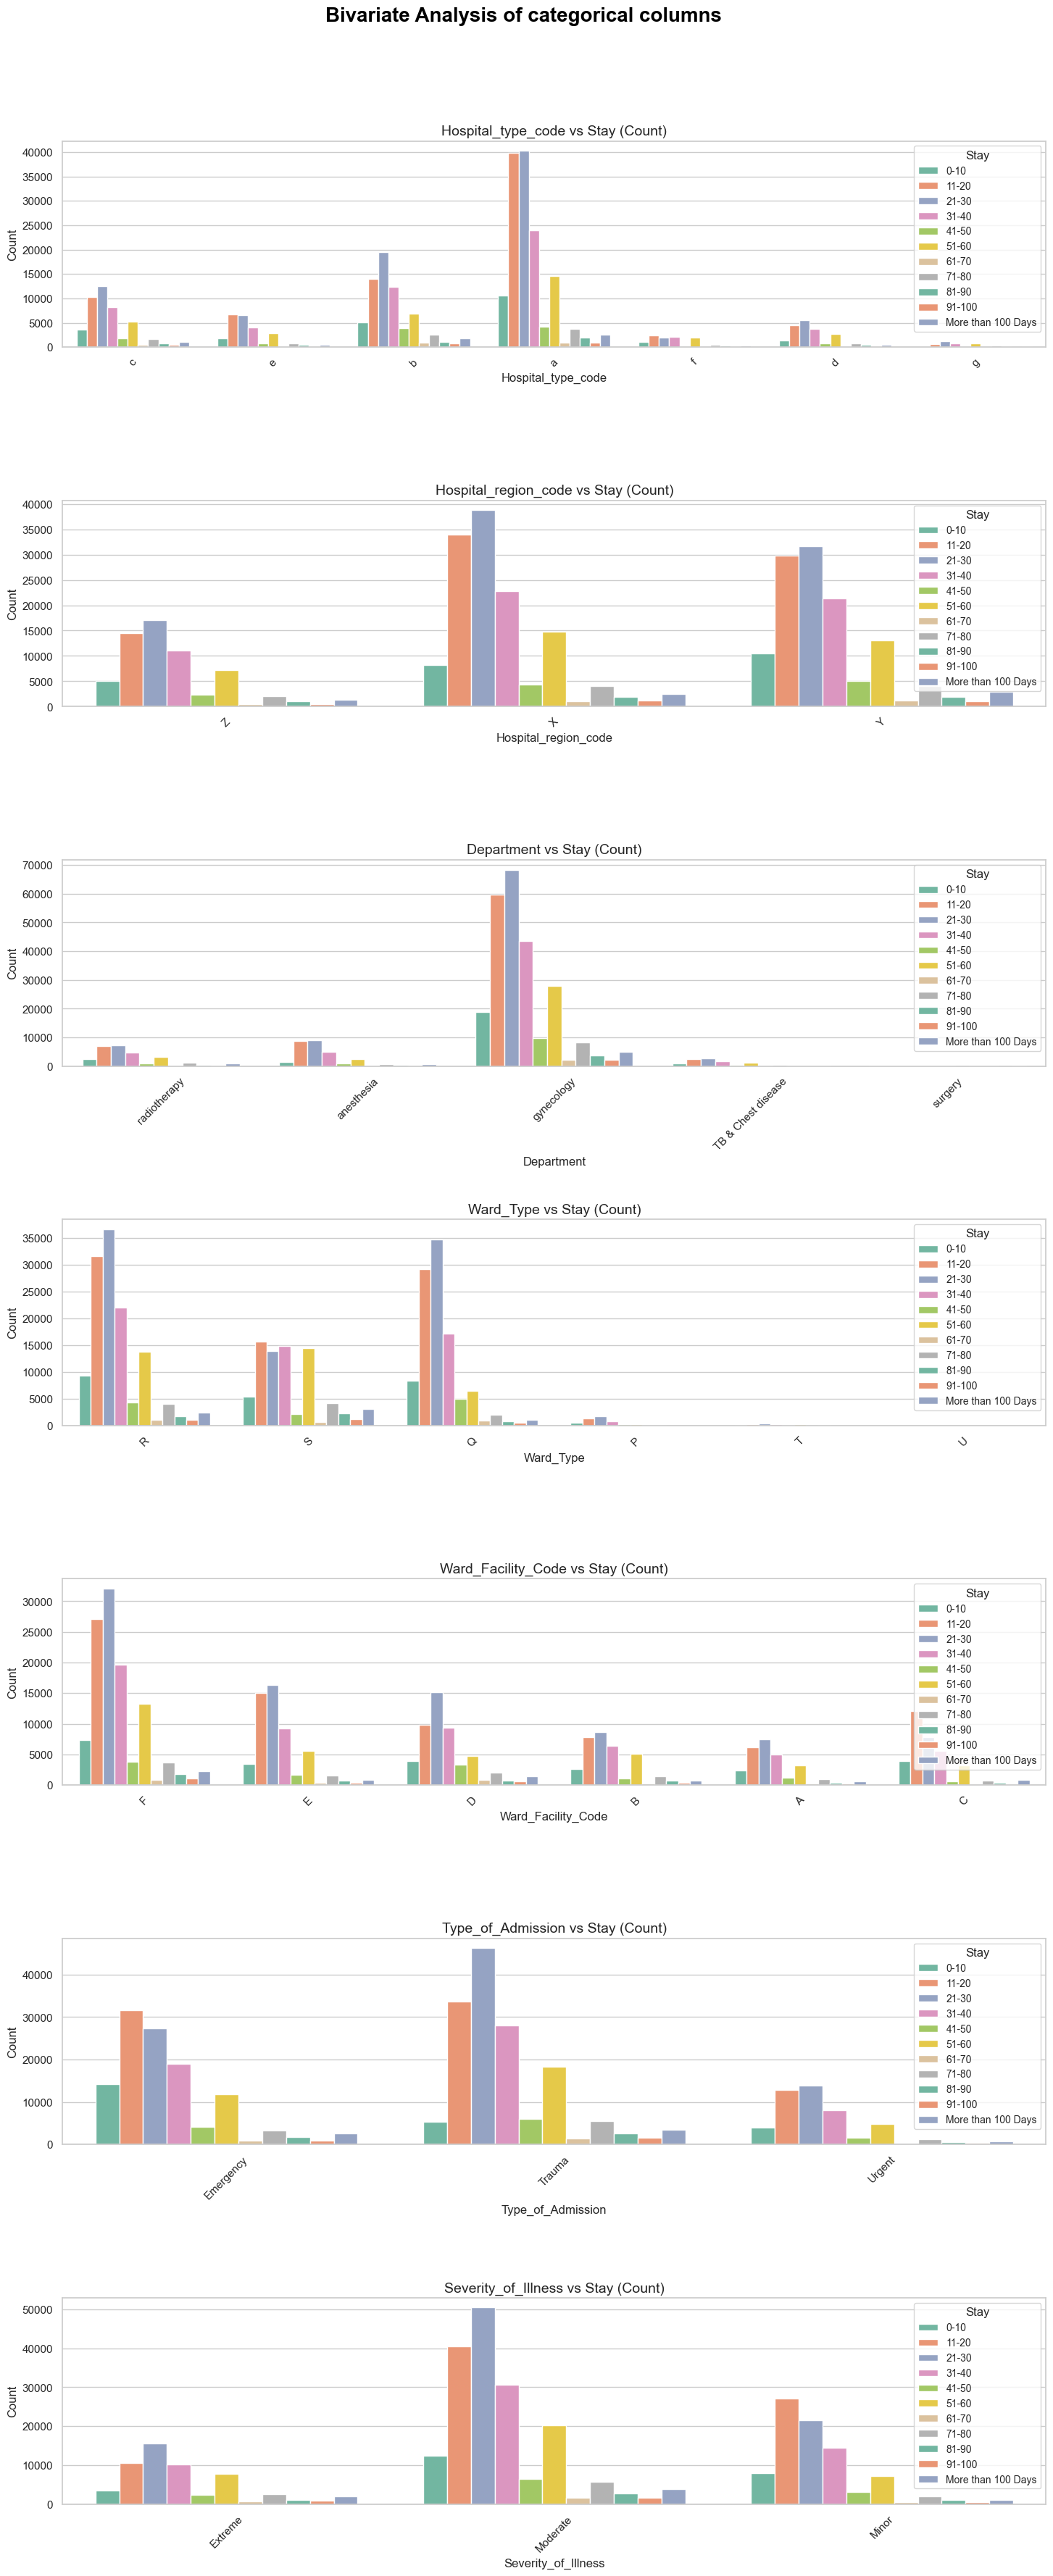

In [27]:
bivariate_categorical_plots(cat_cols)

In [28]:
def bivariate_continous_plots(columns, data=df):
    try:
        sns.set_theme(style="whitegrid")
        n_cols = 2
        n_rows = (len(columns) + n_cols - 1) // n_cols  
        plt.figure(figsize=(6 * n_cols, 5 * n_rows)) 
        plt.suptitle('Bivariate Analysis of Continuous Columns', fontsize=20, fontweight='bold', color='black', y=1.02)

        target = 'Stay'
        for plot, col in enumerate(columns, 1):
            ax = plt.subplot(n_rows, n_cols, plot)
            sns.boxplot(data=data, x=target, y=col, ax=ax, palette='Set3') 
            ax.set_xlabel(target, fontsize=12)
            ax.set_ylabel(col, fontsize=12)
            ax.set_title(f'{col} vs {target} (Boxplot)', fontsize=14)
            ax.tick_params(axis='x', rotation=45)

        plt.tight_layout(pad=2.0, h_pad=3.0, w_pad=3.0)
        plt.show()

    except Exception as e:
        print(f'Exception Occurred: {e}')


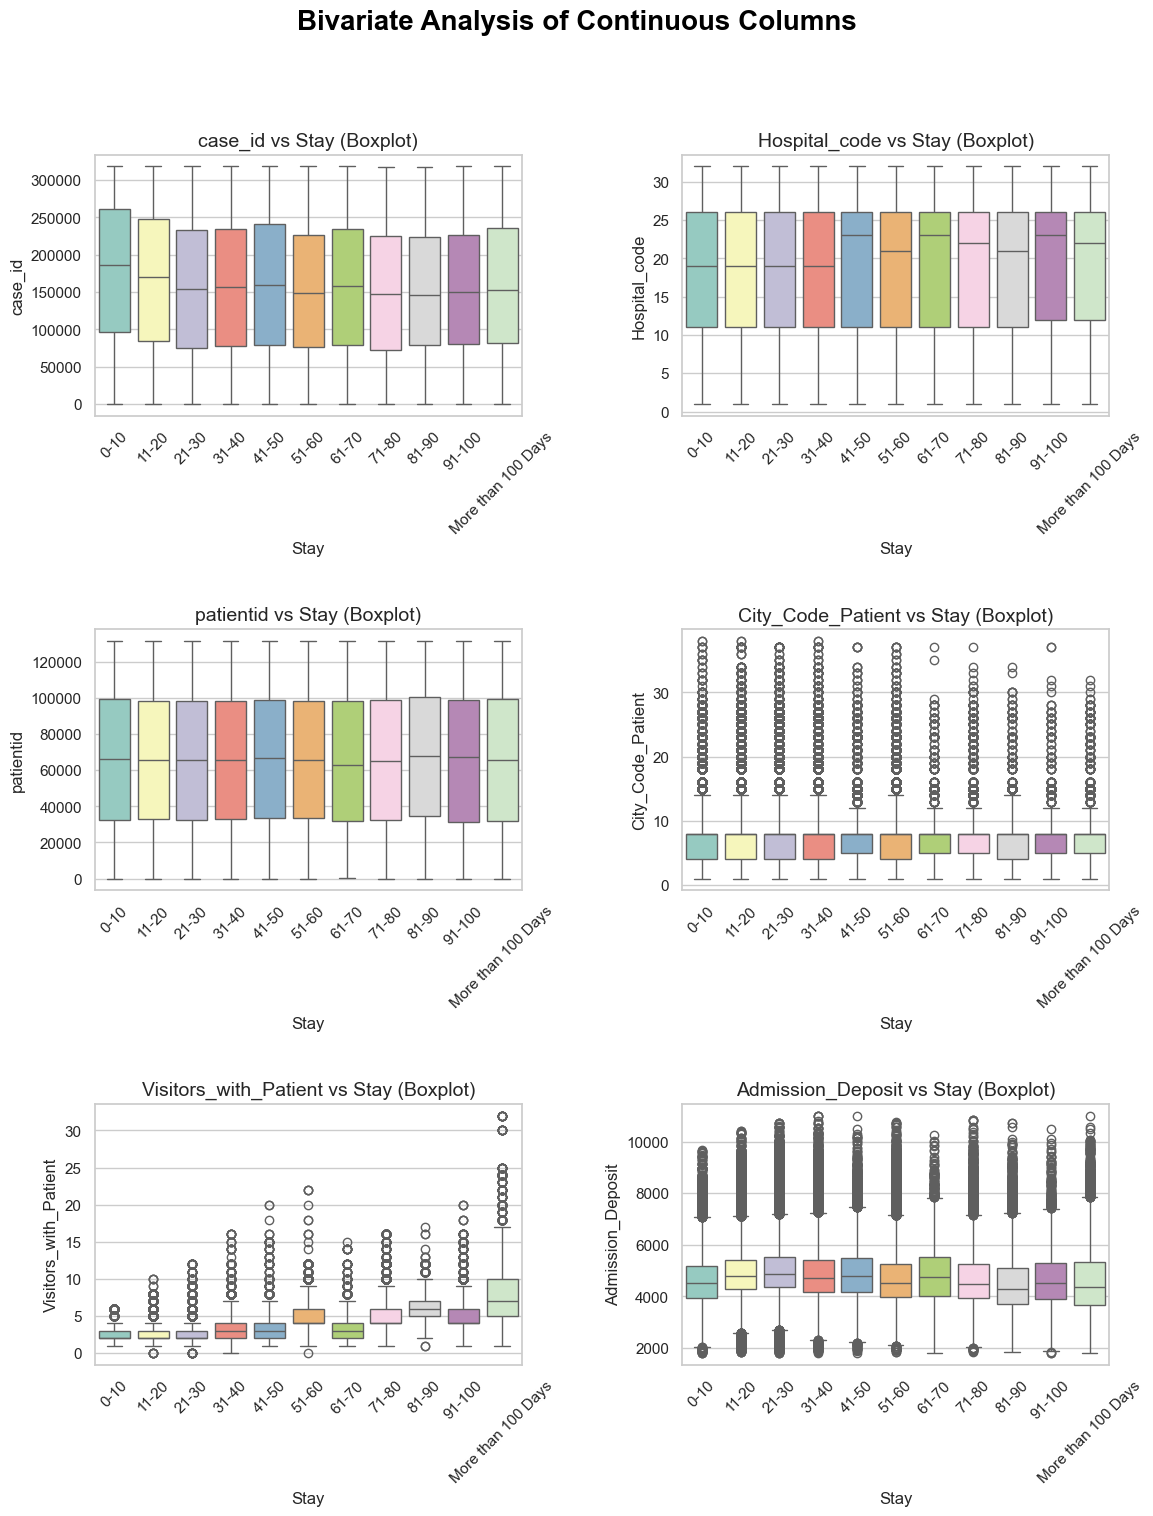

In [29]:
bivariate_continous_plots(continuous_cols)

In [30]:
def bivariate_discrete_plots(columns, data=df):
    try:
        sns.set_theme(style="whitegrid")
        n_cols = 1
        n_rows = (len(columns) + n_cols - 1) // n_cols  
        plt.figure(figsize=(15, 5 * n_rows)) 
        plt.suptitle('Bivariate Analysis of discrete columns', fontsize=20, fontweight='bold', color='black', y=1.02)
        target = 'Stay'
        for plot, col in enumerate(columns, 1):
            ax = plt.subplot(n_rows, n_cols, plot)
            sns.countplot(data=df, x=col, hue=target, palette='Set2', ax=ax)
            ax.set_xlabel(col, fontsize=12)
            ax.set_ylabel('Count', fontsize=12)
            ax.set_title(f'{col} vs {target} (Count)', fontsize=14)
            ax.tick_params(axis='x', rotation=45)
            ax.legend(title=target, loc='upper right', fontsize=10)

        plt.tight_layout(pad=2.0, h_pad=3.0, w_pad=3.0)
        plt.show()
    except Exception as e:
        print(f'Exception Occurred: {e}')

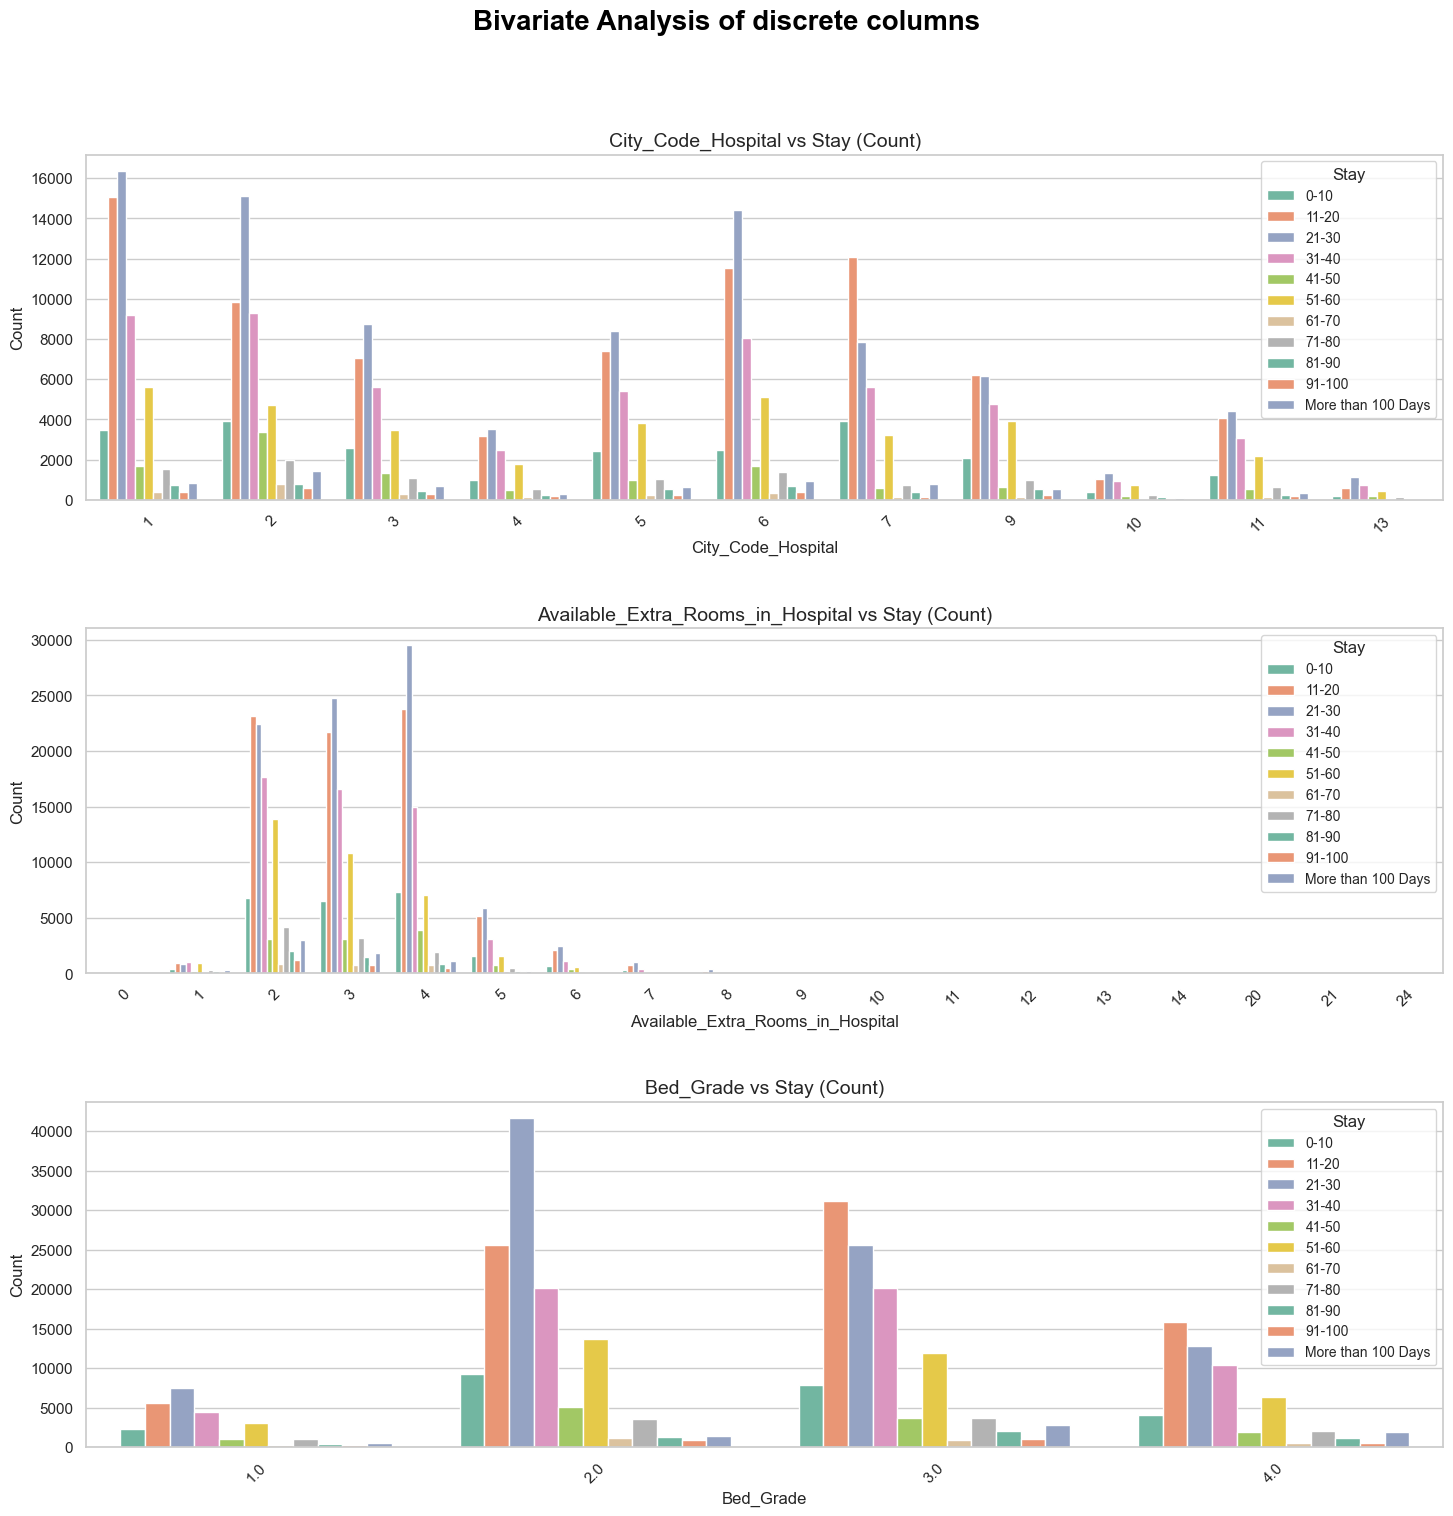

In [31]:
bivariate_discrete_plots(descrete_cols)

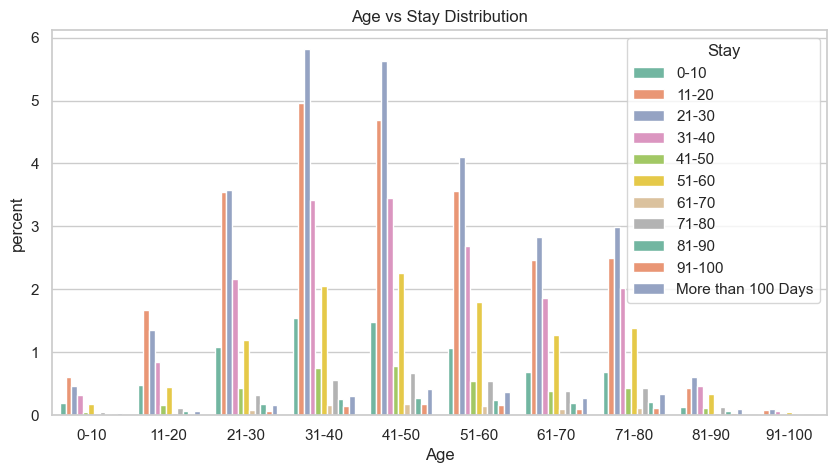

In [32]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='Age',hue='Stay',palette='Set2',stat='percent')
plt.title(f'Age vs Stay Distribution')
plt.show()

## Uses of Heatmaps in Data Analysis:
- A heatmap is a data visualization technique used to represent relationships between variables using color gradients. It helps in quickly identifying patterns, correlations, and trends in large datasets.

- **Key Uses of Heatmaps in Data Analysis**:
- Correlation Analysis – Shows relationships between numerical variables, helping identify strong positive or negative correlations.
- Feature Selection – Helps in selecting highly correlated features for model building and avoiding multicollinearity.
- Anomaly Detection – Highlights unusual values or patterns in data.
- Trend Analysis – Shows how values vary across different categories


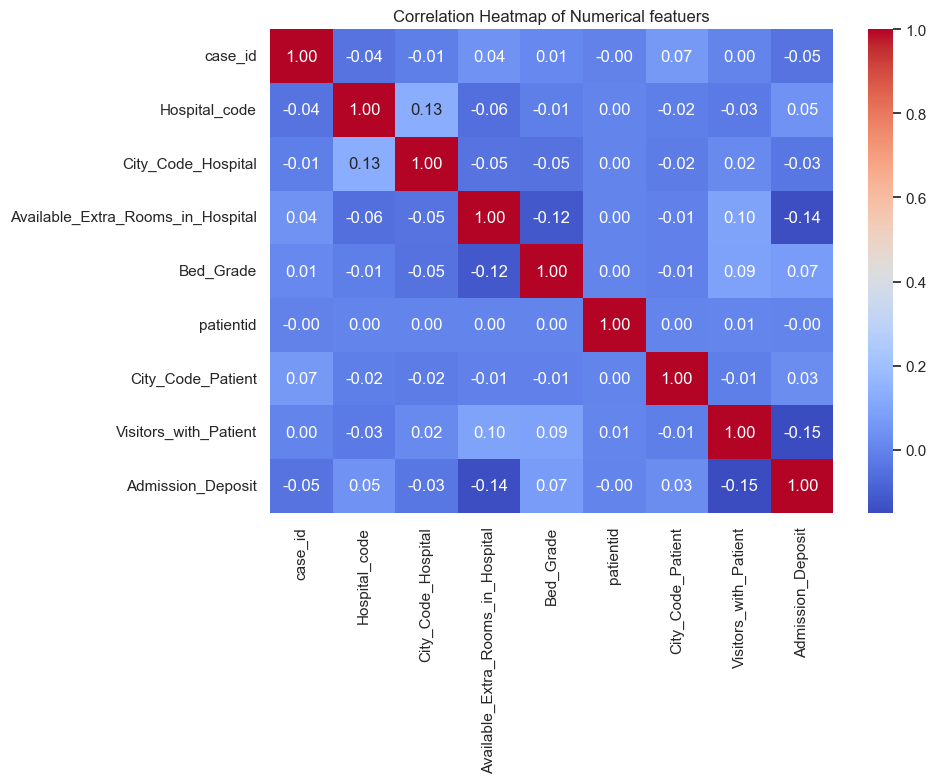

In [33]:
plt.figure(figsize=(10,8))
sns.heatmap(data=df[numeric_cols].corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.title("Correlation Heatmap of Numerical featuers")
plt.tight_layout()
plt.show()

### Heatmap Summary of Numerical Features :
The heatmap shows correlation coefficients between numerical features. Key points:

- Strong positive correlations (1.00) are seen in self-pairs (e.g., case_id, patientid).
- Moderate positive correlations include Hospital_code vs City_Code_Hospital (0.13) and Visitors_with_Patient vs Admission_Deposit (0.15).
- Moderate negative correlations include Available_Extra_Rooms_in_Hospital vs Admission_Deposit (-0.14) and Bed_Grade vs Admission_Deposit (-0.15).
- Most other pairs show weak or no correlation (near 0).

- Insight: Admission_Deposit shows notable relationships with visitors, extra rooms, and bed grade, suggesting further exploration.


### Data Preprocessing and Feature Engineering :

In [ ]:
from utils import Null_values, detect_outliers_iqr,plot_boxplots

In [35]:
## Handling the missing values
Null_values(df)

Missing Values in Each Column: 
 case_id                              0
Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available_Extra_Rooms_in_Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed_Grade                            0
patientid                            0
City_Code_Patient                    0
Type_of_Admission                    0
Severity_of_Illness                  0
Visitors_with_Patient                0
Age                                  0
Admission_Deposit                    0
Stay                                 0
dtype: int64


In [36]:
## Checking the outliers
detect_outliers_iqr(df,continuous_cols)

📊 Outlier Summary (IQR Method):



,Column,Outlier Count,Outlier Percentage
0,case_id,0,0.00
1,Hospital_code,0,0.00
2,patientid,0,0.00
3,City_Code_Patient,24780,7.78
4,Visitors_with_Patient,9804,3.08
5,Admission_Deposit,12316,3.87


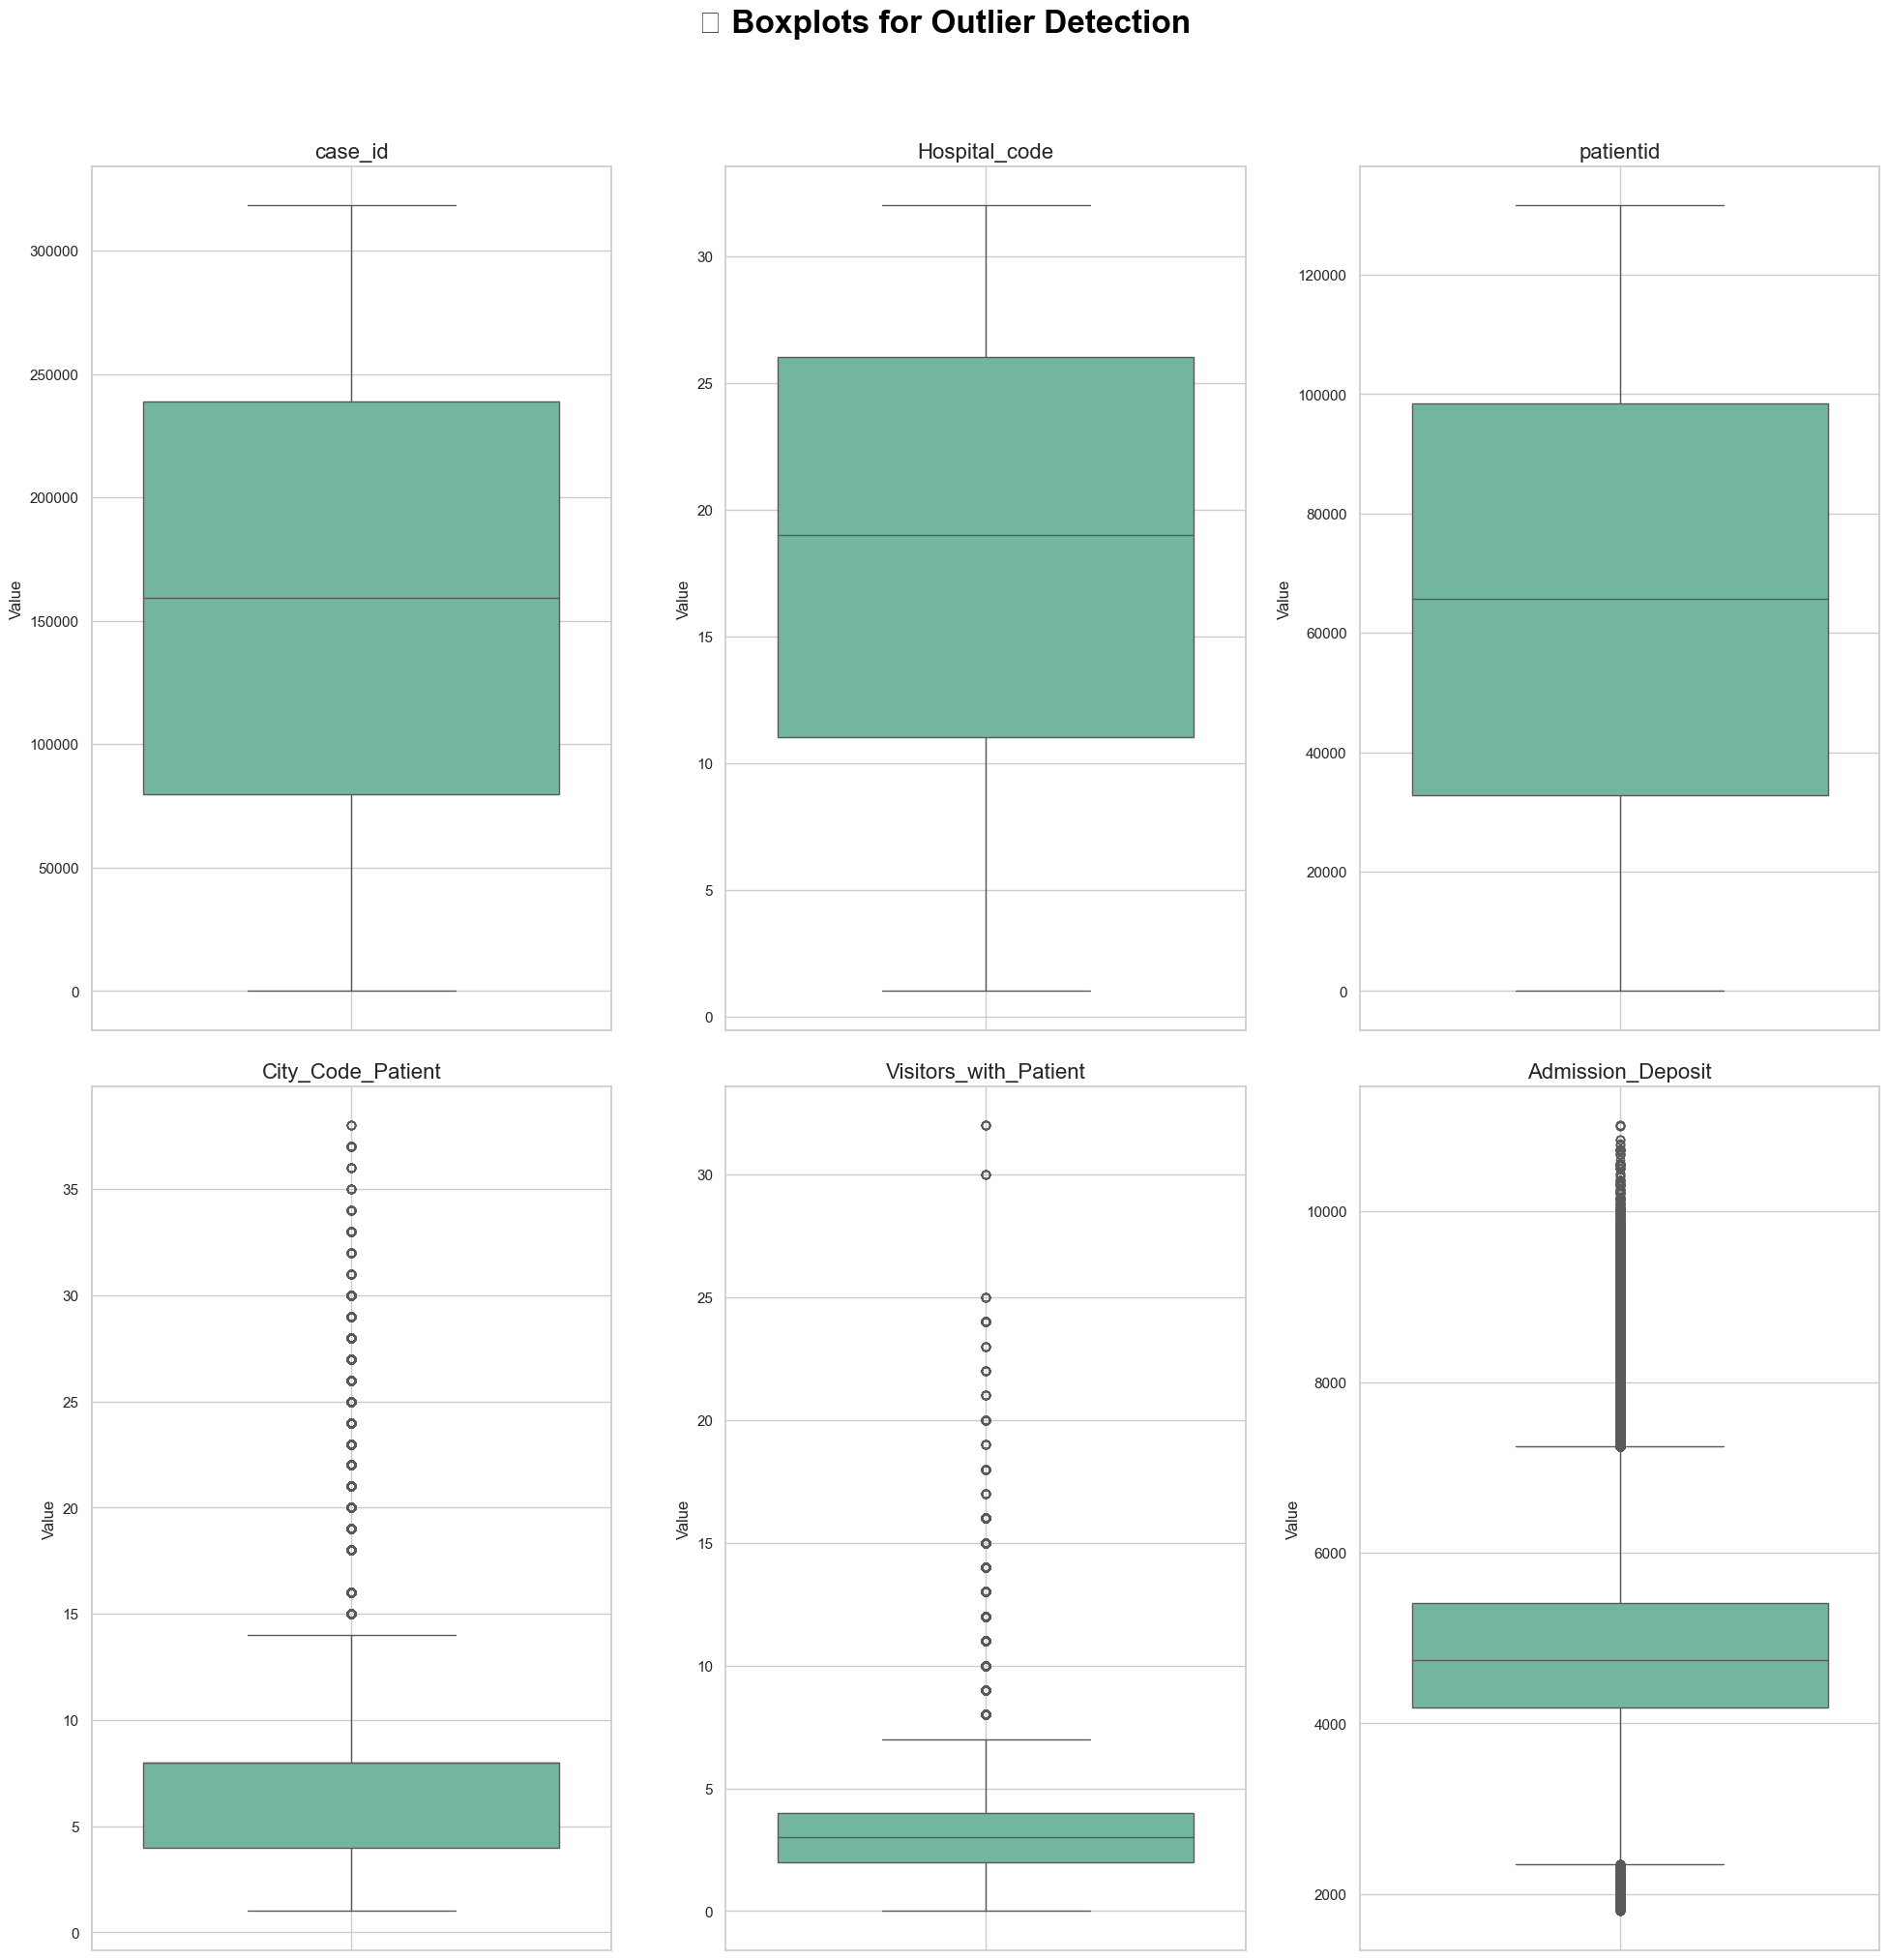

In [37]:
plot_boxplots(df,continuous_cols)

In [38]:
# droping the case id which is not useful for further model training
df.drop('case_id',axis=1,inplace=True)

## Creating preprocessing pipeline :

In [39]:
df['Bed_Grade']=df['Bed_Grade'].apply(int)

In [40]:
df['City_Code_Patient']=df['City_Code_Patient'].apply(int)

In [41]:
from sklearn.preprocessing import OrdinalEncoder

In [42]:
passthrough_columns=['Hospital_code','City_Code_Hospital','Available_Extra_Rooms_in_Hospital','Bed_Grade','City_Code_Patient','Visitors_with_Patient']
ordinal_encoding_columns=['Hospital_region_code','Severity_of_Illness','Age']
one_hot_columns=['Department','Type_of_Admission']
scaling_columns=['patientid','Admission_Deposit']
custom_ordinal_columns = ['Hospital_type_code', 'Ward_Type', 'Ward_Facility_Code']

In [43]:
df['Severity_of_Illness'].value_counts()

Severity_of_Illness
Moderate    175843
Minor        85872
Extreme      56723
Name: count, dtype: int64

In [44]:
def Ordinal_encoder(df,*args,**kwargs):
    df_copy = df.copy()
    mappings = {
        'Hospital_region_code': ['X','Y','Z'],
        'Severity_of_Illness': ['Minor','Moderate','Extreme'],
        'Age':['0-10', '11-20', '21-30', '31-40', '41-50','51-60', '61-70', '71-80', '81-90', '91-100']
    }

    for col, cat_order in mappings.items():
        encoder = OrdinalEncoder(categories=[cat_order])
        df_copy[[col]] = encoder.fit_transform(df_copy[[col]])
    
    return df_copy

In [45]:
def scaling(x,*args,**kwargs):
    scaled_df=x.copy()
    Scaler=StandardScaler()
    scaled_dfx=Scaler.fit_transform(scaled_df)
    return scaled_dfx

In [46]:
def custom_ordinal_encoder(df):
    df_copy = df.copy()
    mappings = {
        'Hospital_type_code': df_copy['Hospital_type_code'].value_counts().index.tolist()[::-1],
        'Ward_Type': df_copy['Ward_Type'].value_counts().index.tolist()[::-1],
        'Ward_Facility_Code': df_copy['Ward_Facility_Code'].value_counts().index.tolist()[::-1]
    }

    for col, cat_order in mappings.items():
        encoder = OrdinalEncoder(categories=[cat_order])
        df_copy[[col]] = encoder.fit_transform(df_copy[[col]])
    
    return df_copy


In [47]:
from sklearn.preprocessing import  OneHotEncoder

In [48]:
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), one_hot_columns),
        ('ordinal', FunctionTransformer(Ordinal_encoder, validate=False), ordinal_encoding_columns),
        ('custom_ordinal', FunctionTransformer(custom_ordinal_encoder, validate=False), custom_ordinal_columns),
        ('scaling', FunctionTransformer(scaling, validate=False), scaling_columns),
        ('passthrough', 'passthrough', passthrough_columns)
    ]
)


In [49]:
stay_order = ['0-10', '11-20', '21-30', '31-40', '41-50','51-60', '61-70', '71-80', '81-90', '91-100', 'More than 100 Days']
order_mapping={}
for i,idx in enumerate(stay_order,0):
    order_mapping[idx]=i
print(order_mapping)

{'0-10': 0, '11-20': 1, '21-30': 2, '31-40': 3, '41-50': 4, '51-60': 5, '61-70': 6, '71-80': 7, '81-90': 8, '91-100': 9, 'More than 100 Days': 10}


In [50]:
X=df.iloc[:,:-1]
Y=df['Stay'].replace({'0-10': 0, '11-20': 1, '21-30': 2, '31-40': 3, '41-50': 4, '51-60': 5, '61-70': 6, '71-80': 7, '81-90': 8, '91-100': 9, 'More than 100 Days': 10})

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [52]:
X_train_preprocessor=preprocessor.fit_transform(X_train)
X_test_preprocessor=preprocessor.transform(X_test)

In [53]:
OHE_feature_names=['TB_Chest disease_DEPT','anesthesia_DEPT','gynecology_DEPT','radiotherapy_DEPT','surgery_DEPT','Emergency_Admission','Trauma_Admission','Urgent_Admission']
ordinal_encoding_columns=['Hospital_region_code','Severity_of_Illness','Age']
custom_ordinal_columns = ['Hospital_type_code', 'Ward_Type', 'Ward_Facility_Code']
scaling_columns=['patientid','Admission_Deposit']
passthrough_columns=['Hospital_code','City_Code_Hospital','Available_Extra_Rooms_in_Hospital','Bed_Grade','City_Code_Patient','Visitors_with_Patient']

In [54]:
Feature_names=np.concat([OHE_feature_names,ordinal_encoding_columns,custom_ordinal_columns,scaling_columns,passthrough_columns])
x_train=pd.DataFrame(X_train_preprocessor,columns=Feature_names)
x_test=pd.DataFrame(X_test_preprocessor,columns=Feature_names)

### Saving all the preprocessed files in data directory.

In [55]:
try:
    base_dir = os.path.dirname(os.getcwd()) 
    save_path = os.path.join(base_dir, "data", "preprocessed")
    print(base_dir)
    print(save_path)

    os.makedirs(save_path, exist_ok=True)

    train_df = pd.concat([pd.DataFrame(x_train), y_train.reset_index(drop=True)], axis=1)
    test_df = pd.concat([pd.DataFrame(x_test), y_test.reset_index(drop=True)], axis=1)
    preprocessed_df = pd.concat([train_df, test_df], axis=0).reset_index(drop=True)

    train_df.to_csv(os.path.join(save_path, "train_df.csv"), index=False)
    test_df.to_csv(os.path.join(save_path, "test_df.csv"), index=False)
    preprocessed_df.to_csv(os.path.join(save_path, "preprocessed_df.csv"), index=False)

    print(" All preprocessed files saved successfully!")

except Exception as e:
    print("An error occurred while saving preprocessed files:")
    print(str(e))


f:\Machine_Learning\Ml_Projects\Hospital_Stay_Prediction
f:\Machine_Learning\Ml_Projects\Hospital_Stay_Prediction\data\preprocessed
 All preprocessed files saved successfully!
